In [3]:
# from rdkit import Chem
# from proton_transfer import proton_transfer_predict

# # Example 1: Protonation of methylamine (CH3NH2) by hydronium (H3O+)
# amine = Chem.MolFromSmiles('CN')
# hydronium = Chem.MolFromSmiles('[OH3+]')

# mp = proton_transfer_predict([amine, hydronium])
# best_products, best_meta = mp.best()
# {
#     "best_products": [Chem.MolToSmiles(m, canonical=True) for m in best_products],
#     "best_meta": best_meta,
#     "ranked_unique": [
#         {
#             "smiles": [Chem.MolToSmiles(m, canonical=True) for m in s.products()],
#             "smiles_explicit": s.products_explicit_smiles(),
#             "score": s.score,
#             "labels": s.labels,
#         }
#         for s in mp.ranked_unique()[:5]
#     ],
# }


# # Example 2: Protonation of 4-aminopyridine by hydronium
# # 4-aminopyridine SMILES: Nc1ccncc1
# ap = Chem.MolFromSmiles('Nc1ccncc1')
# hydronium = Chem.MolFromSmiles('[OH3+]')

# mp = proton_transfer_predict([ap, hydronium])
# best_products, best_meta = mp.best()
# {
#     "best_products": [Chem.MolToSmiles(m, canonical=True) for m in best_products],
#     "best_meta": best_meta,
#     "ranked_unique": [
#         {
#             "smiles": [Chem.MolToSmiles(m, canonical=True) for m in s.products()],
#             "smiles_explicit": s.products_explicit_smiles(),
#             "score": s.score,
#             "labels": s.labels,
#         }
#         for s in mp.ranked_unique()[:5]
#     ],
# }


In [1]:
from rdkit import Chem
from rdkit.Chem import Draw, rdMolDescriptors
from IPython.display import display

from proton_transfer import proton_transfer_predict, MechanismOptions


def show_candidates(mp, top_k=12, mols_per_row=3, size=(300, 300), legend_mode="canonical+formula"):
    entries = mp.ranked_unique()[:top_k]
    mols = []
    legends = []
    for s in entries:
        prods = [Chem.AddHs(m) for m in s.products()]
        combined = prods[0]
        for m in prods[1:]:
            combined = Chem.CombineMols(combined, m)
        mols.append(combined)
        canonical = [Chem.MolToSmiles(m, canonical=True) for m in s.products()]
        explicit = s.products_explicit_smiles()
        formulas = [rdMolDescriptors.CalcMolFormula(Chem.AddHs(m)) for m in s.products()]
        if legend_mode == "explicit":
            desc = " . ".join(explicit)
        elif legend_mode == "formula":
            desc = " + ".join(formulas)
        elif legend_mode == "canonical":
            desc = " . ".join(canonical)
        else:  # canonical+formula
            desc = f"{' . '.join(canonical)} | {' + '.join(formulas)}"
        legends.append(f"{desc}\n{mp.describe(s)}")
    img = Draw.MolsToGridImage(mols, molsPerRow=mols_per_row, subImgSize=size, legends=legends)
    display(img)

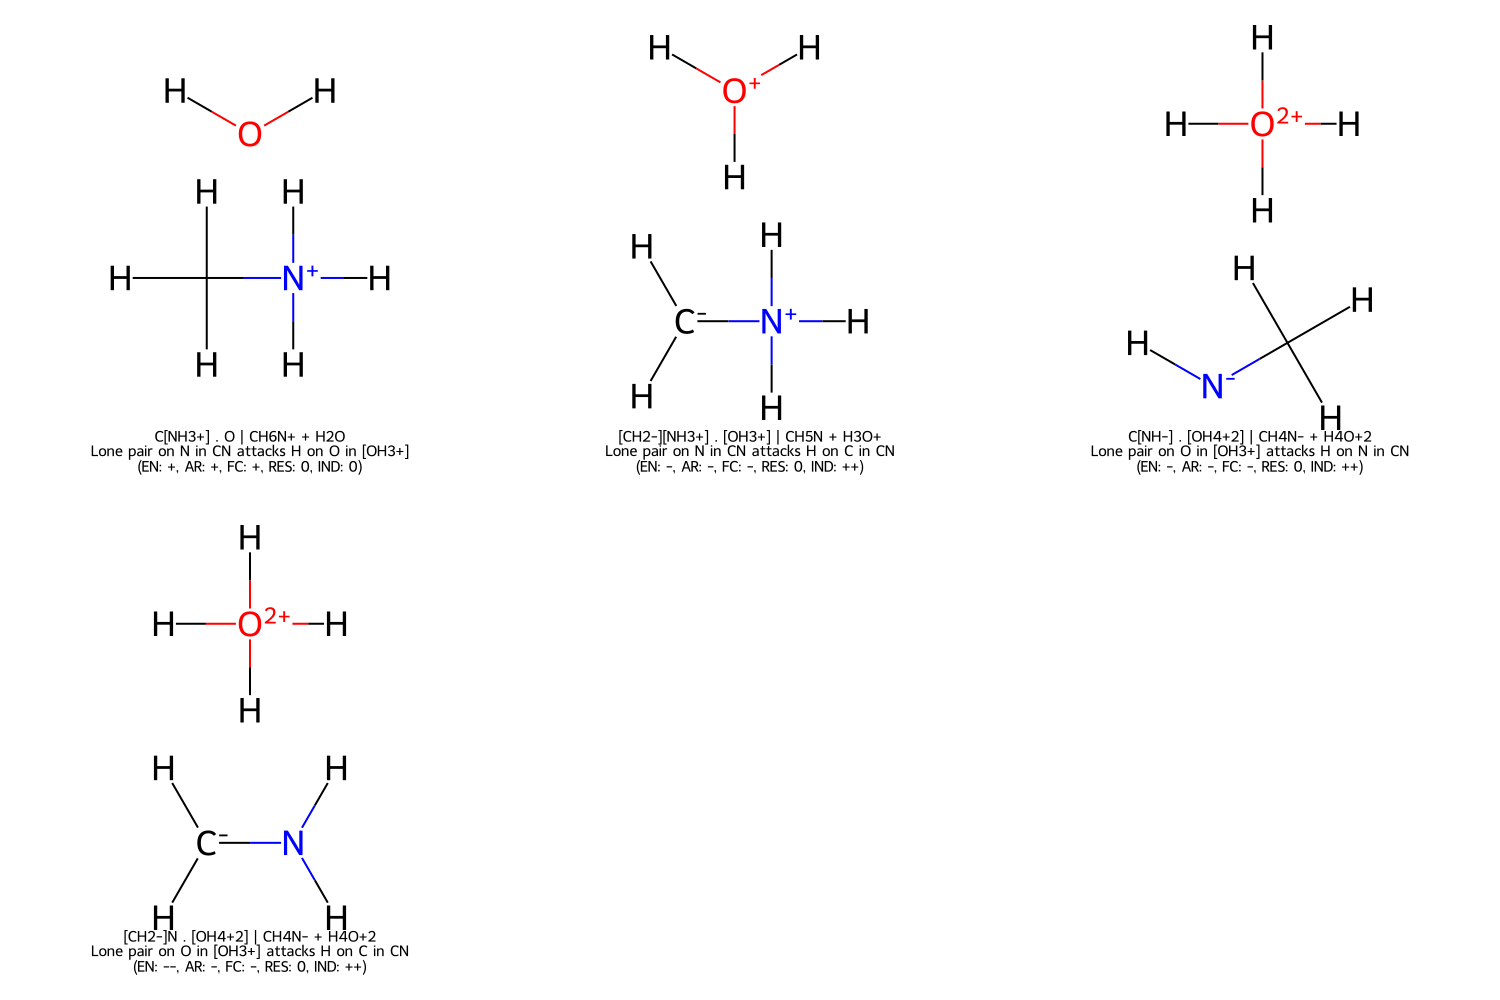

In [2]:
# Visualize the candidates for Example 1
options = MechanismOptions(
    include_positive_acceptors=True,
    enumerate_all_acceptors=True,
)
# TODO: add back all the carbons.

mp = proton_transfer_predict([Chem.MolFromSmiles('CN'), Chem.MolFromSmiles('[OH3+]')], options)
show_candidates(mp, top_k=10, mols_per_row=3, size=(500, 500))

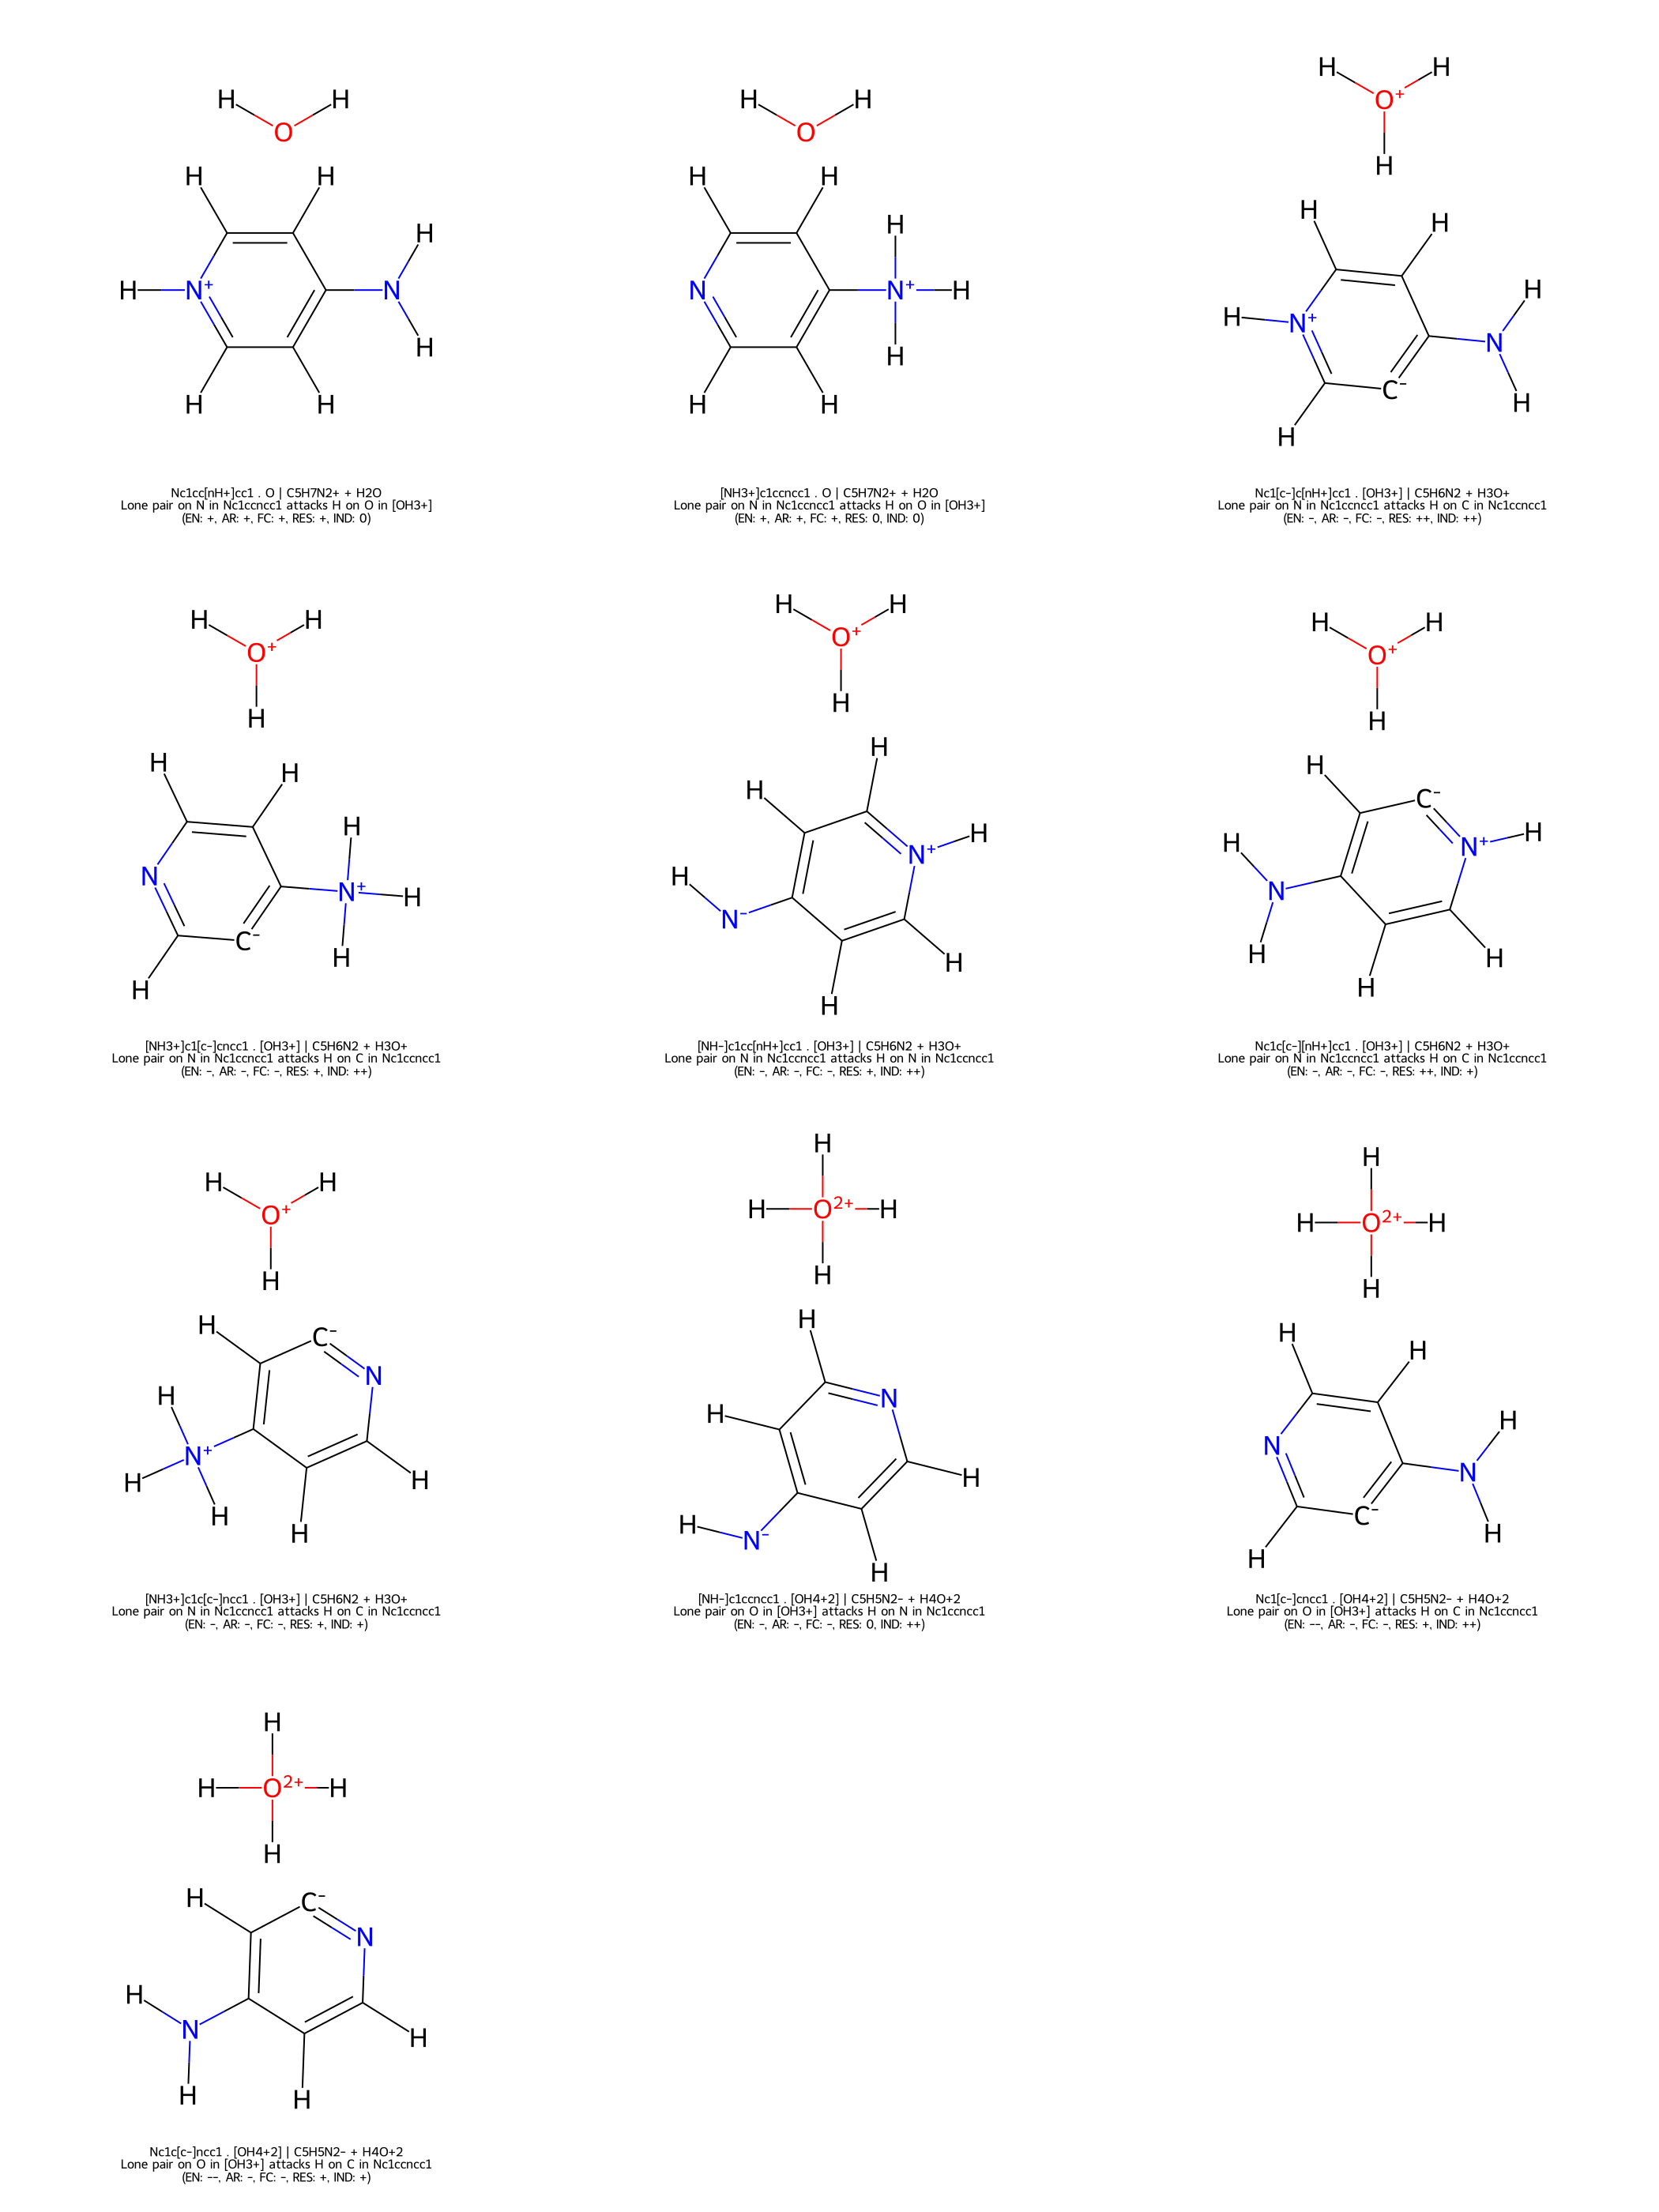

In [ ]:
# Visualize the candidates for Example 2
options = MechanismOptions(include_positive_acceptors=True)

mp = proton_transfer_predict([Chem.MolFromSmiles('Nc1ccncc1'), Chem.MolFromSmiles('[OH3+]')], options)
show_candidates(mp, top_k=20, mols_per_row=3, size=(700, 700))


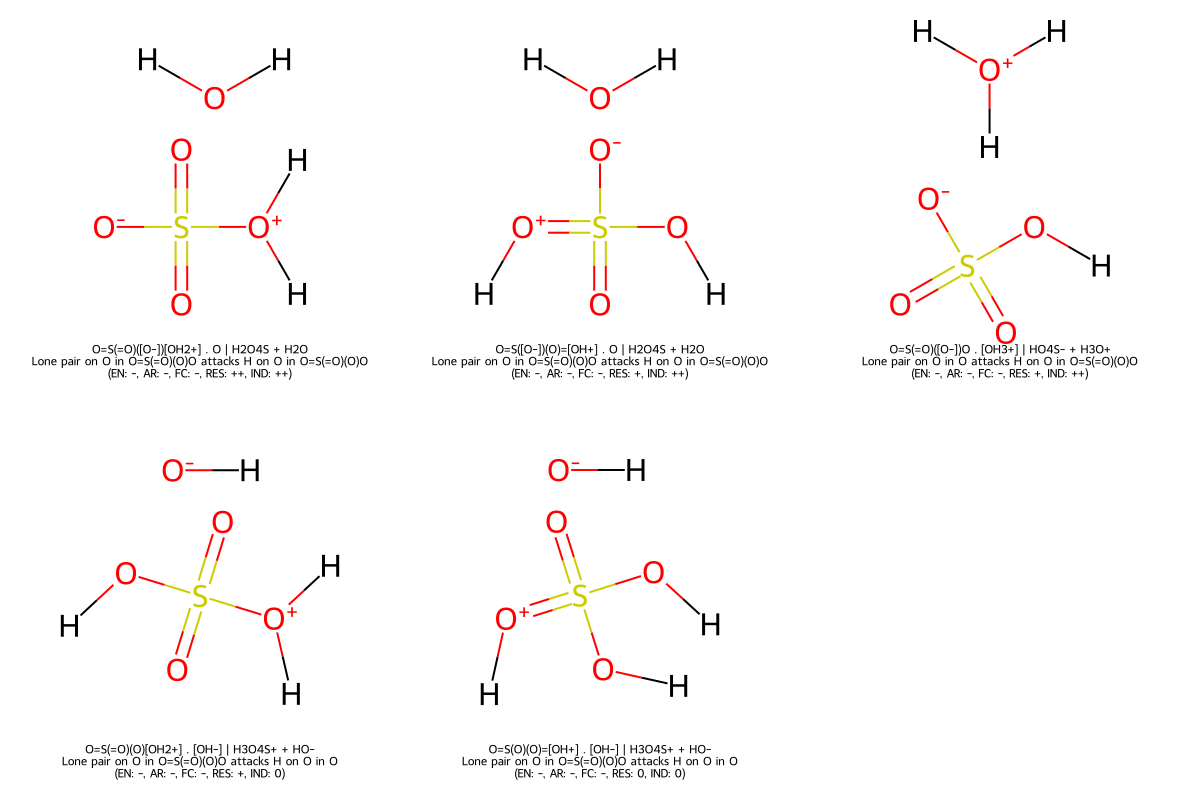

In [7]:
# Visualize the candidates for Example 3
options = MechanismOptions(include_positive_acceptors=True)

mp = proton_transfer_predict([Chem.MolFromSmiles('OS(=O)(=O)O'), Chem.MolFromSmiles('O')], options)
show_candidates(mp, top_k=20, mols_per_row=3, size=(400, 400))
